<h1 style="color: #001a79;">Topic 2 - Models</h1>

In [2]:
# Efficient numerical arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Fancier plotting.
import seaborn as sns

# Optimization.
import scipy.optimize as so

<h3 style="color: #001a79;">Exercise 1</h3>

<hr style="border-top: 1px solid #001a79;" />

Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

***The absolute value function*** outputs the magnitude of the number i.e. if the number is negative, it drops the negative sign. 

<img src="content/absolute_value.svg" alt="absolute_value" style="width:200px;"/>

Source: <a href="https://www.google.com/search?q=absolute+value+function&oq=ab&aqs=chrome.0.69i59l2j69i60l3j5l3.2279j0j7&sourceid=chrome&ie=UTF-8" target="_blank">Google: Absolute Value Fuction</a>

***Example:*** <br>
If f(x) = |x| and x = 3 <br>
x $\ge$ 0 <br>
f(3) = |3| = 3 <br>

If f(x) = |x| and x = -3<br>
x < 0 <br>
f(-3) = |-3| = 3

Let take a list of numbers x = [-10, -9, -8.....8, 9, 10]

In [56]:
x = np.arange(-10, 10.5, 1)

Apply the f(x) = |x| to get y values.

In [57]:
y = np.absolute(x)

In [58]:
# Print calculations
for i in range(0, len(x)):
    print(f'f({x[i]}) = |{x[i]}| = {y[i]}')

f(-10.0) = |-10.0| = 10.0
f(-9.0) = |-9.0| = 9.0
f(-8.0) = |-8.0| = 8.0
f(-7.0) = |-7.0| = 7.0
f(-6.0) = |-6.0| = 6.0
f(-5.0) = |-5.0| = 5.0
f(-4.0) = |-4.0| = 4.0
f(-3.0) = |-3.0| = 3.0
f(-2.0) = |-2.0| = 2.0
f(-1.0) = |-1.0| = 1.0
f(0.0) = |0.0| = 0.0
f(1.0) = |1.0| = 1.0
f(2.0) = |2.0| = 2.0
f(3.0) = |3.0| = 3.0
f(4.0) = |4.0| = 4.0
f(5.0) = |5.0| = 5.0
f(6.0) = |6.0| = 6.0
f(7.0) = |7.0| = 7.0
f(8.0) = |8.0| = 8.0
f(9.0) = |9.0| = 9.0
f(10.0) = |10.0| = 10.0


We now have of (x, y) co-ordinates where -10 $\le$ x $\ge$ 10. Let graph them. 

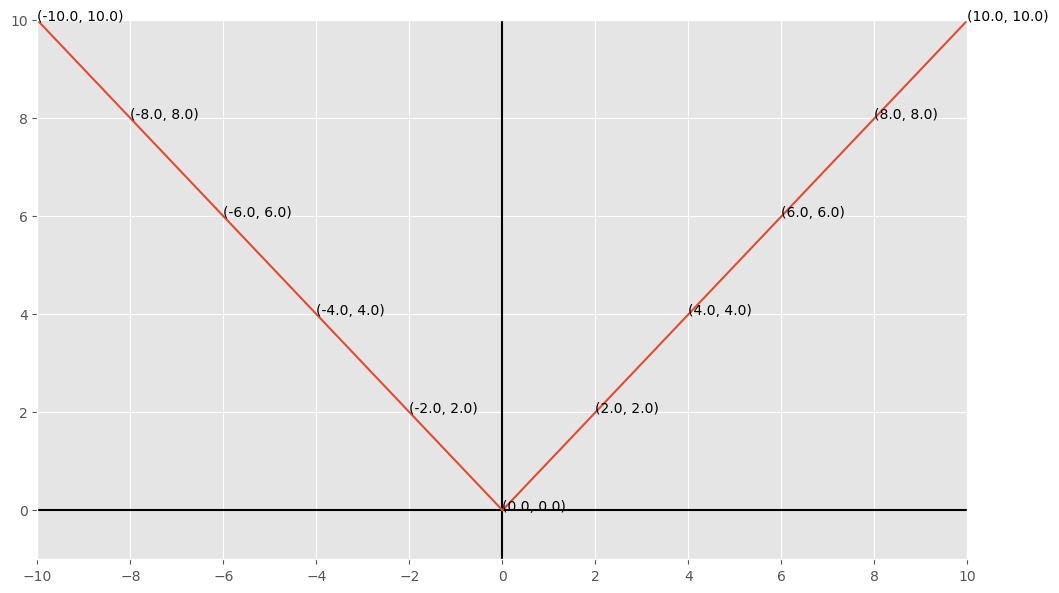

In [59]:
# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 7)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

# Draw some axes.
plt.plot([-10, 10], [0, 0], 'k-')
plt.plot([0, 0], [-1, 10], 'k-')

axes = plt.subplot()
axes.axis([-10, 10, -1, 10])
axes.xaxis.set_major_locator(MultipleLocator(2.0))
axes.yaxis.set_major_locator(MultipleLocator(2.0))

for i in range(0, len(x), 2):
    plt.text(x[i], y[i], f'({x[i]}, {y[i]})', fontsize=10)

plt.plot(x,y)
plt.show()

The f(x) = |x| graph is a V-shape where all y values are $\ge$ 0. 

The domain of f(x) is (-$\infty$, $\infty$). 

The range of f(x) is [0, $\infty$).

Source: <a href="https://math.meta.stackexchange.com/a/27875" target="_blank">StackExchange: How do I write an infinity symbol is LaTeX</a>

***Why the absolute value function is not typically used in fitting straight lines to data?***

All straight lines can be expressed in the form $y = mx + c$.

The number $m$ is the slope of the line.

The slope is how much $y$ increases by when $x$ is increased by 1.0.

The number $c$ is the y-intercept of the line.

It's the value of $y$ when $x$ is 0.

To fit a straight line to the data, we just must pick values for $m$ and $c$. 

We use the cost function to calculate the difference from the value that was observed ($y_i$) and the value that the model gives ($m x_i + c$). 

$$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$

The best line will be one that is “closest” to the points on the scatterplot. In other words, the best line is one that minimises the total distance between itself and all the observed data points.

Note that the cost function squares the difference and sums the values. The reason being if we allow the values to be positive or negative, then the positive could cancel the negatives.

But why square the values? Why not get the absolute values? 

$$ Cost(m, c) = \sum_i |(y_i - mx_i - c)| $$

When we have a formula that we want to maximize or minimize, we can use differentiation to find that maximum or minimum value. For this you would take the first derivative and set it equal to zero. 

However, absolute values are difficult to work with in mathematics (especially Calculus).

If we take $f(x)$ = $|x|$ we can prove that $f(x)$ is not differentiable at $x = 0$. 

$$\lim_{h \to 0} {f(0 + h) - f(0)\over h}$$

$$=\lim_{h \to 0} {|0 + h| - |0|\over h}$$

$$=\lim_{h \to 0} {|h|\over h}$$

Right Limit:

$$=\lim_{h \to 0^+} {|h|\over h}$$

Since $h > 0$

$$=\lim_{h \to 0^+} {|h|\over h} = 1$$

Left Limit:

$$=\lim_{h \to 0^-} {|h|\over h}$$

Since $h < 0$

$$=\lim_{h \to 0^-} {-h\over h} = -1$$

The left and right limit are not equal therefore the limit does not exist. 

Source: <a href="https://math.stackexchange.com/a/991559" target="_blank">StackExchange: Proof that |x| is not differentiable at x=0</a>

From this we see we cannot use $Cost(m, c) = \sum_i |(y_i - mx_i - c)|$. 

In mathematical terms, we would say this is because the use of absolute values results in discontinuous derivatives that cannot be treated analytically.

Source: <a href="https://www.bradthiessen.com/html5/docs/ols.pdf" target="_blank">bradthiessen.com - Why we use “least squares” regression instead of “least absolute deviations” regression.</a>

<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />

Fit a straight line to the following data points, using all three methods used above.

Do you think a straight line is a good model for these points?

In [1]:
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

x = np.array(x)
y = np.array(y)

NameError: name 'np' is not defined

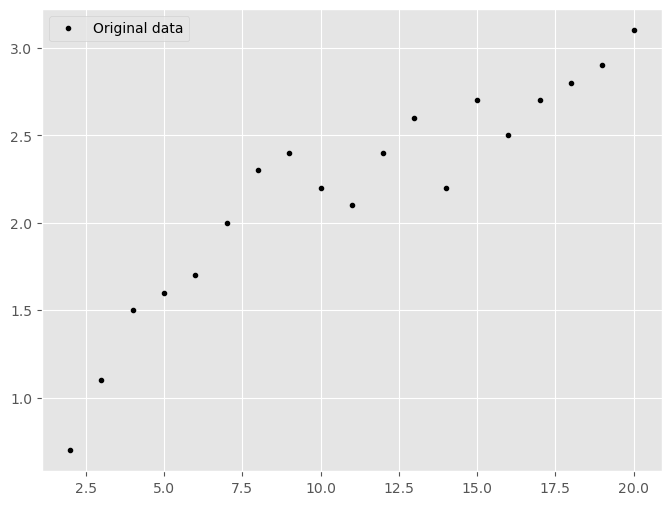

In [71]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.legend()

# Show the plot.
plt.show()

#### The minimisation calculations

Using the lecture notes we are able to find m and c using:

$$ m = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2} \qquad \textrm{and} \qquad c = \bar{y} - m \bar{x} $$

where $\bar{x}$ is the mean of $x$ and $\bar{y}$ that of $y$.

In [81]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of x and y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# The best m is found by the following calculation.
m_a = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Use m from above to calculate the best c.
c_a = y_avg - m_a * x_avg

print("m is %8.6f and c is %6.6f." % (m_a, c_a))

m is 0.103158 and c is 1.049474.


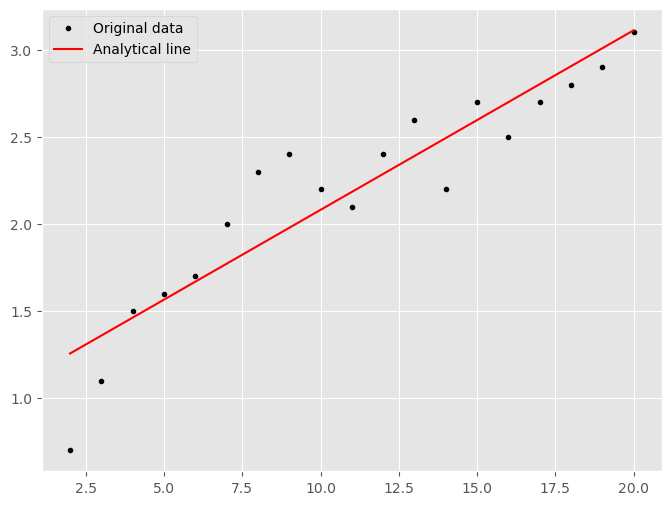

In [82]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_a * x + c_a, 'r-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

#### Optimisation

In [84]:
# The function to be minimized - the cost function.
# It must take a single argument! But our cost function takes 2: m and c.
# So, we'll put them in a list called MC. e.g. MC = (5, 10)
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

In [85]:
result = so.minimize(cost, (2.0, 2.0))
result

      fun: 1.03957894736911
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([1.49011612e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [86]:
# Extract the optimized m and c.
m_o, c_o = result.x
# Print them.
m_o, c_o

(0.10315785999003411, 1.0494740589312146)

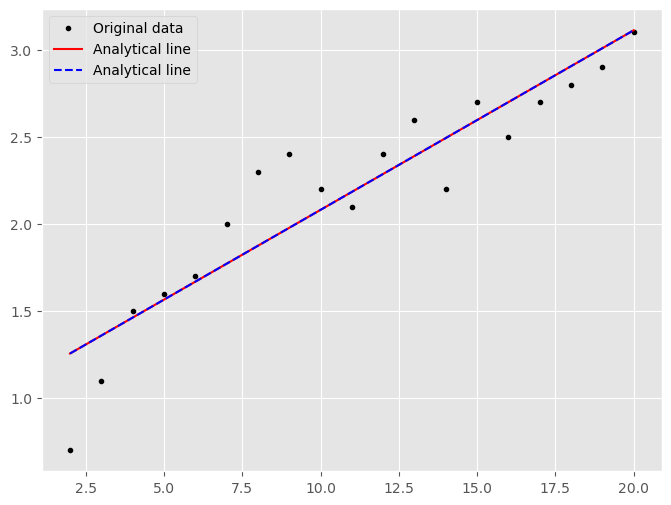

In [90]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_a * x + c_a, 'r-', label='Analytical line')
ax.plot(x, m_o * x + c_o, 'b--', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

In [91]:
#### Curve fitting